# **Chapter02 데이터 다루기**

> **머신러닝**
<ul>
  <li>지도학습(Supervised Learning)</li>
  <ul>
    <li>K-최근접이웃</li>
  </ul>
  <li>비지도학습(Unsupervised Learning)</li>
  <li>강화학습(reinforcement Learning)</li>
</ul>



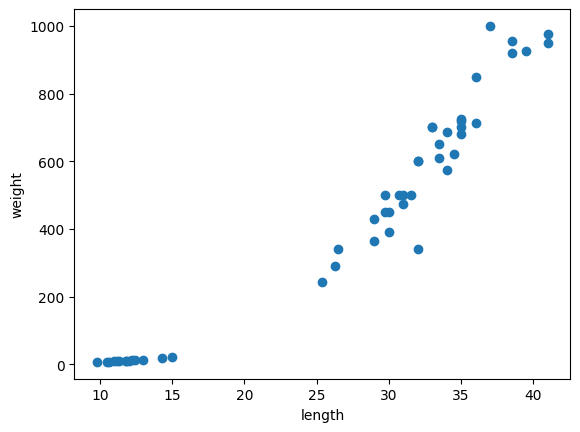

In [1]:
#사용할 물고기 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

#그래프로 표시해보기
import matplotlib.pyplot as plt

plt.scatter(fish_length, fish_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [6]:
#sample
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]

#정답(1:도미, 0:빙어)
fish_target = [1] * 35 + [0] * 14

#지도학습 K-최근접이웃
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(fish_data, fish_target)

kn.score(fish_data, fish_target)

kn.predict([[30, 600]])

#array([1]) 반환

array([1])



> **훈련데이터(훈련세트 + 테스트세트)**

* 훈련데이터 안에서 일부분은 `테스트 세트`로 남겨두기
* 이때 `샘플링 편향` 주의
* `numpy`의 random을 사용하여 데이터를 섞음

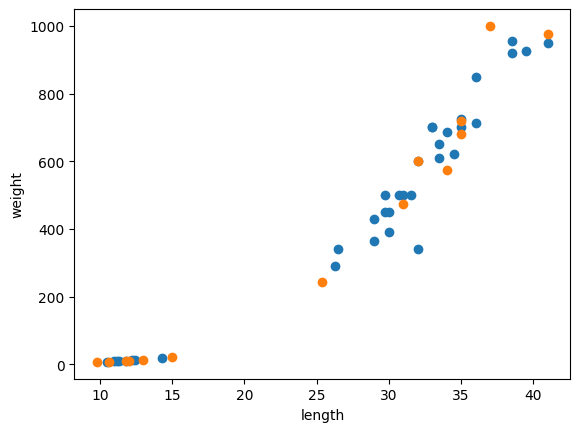

In [8]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

#49개 길이(0~48)의 array
index = np.arange(49)

#랜덤섞기
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

#======================================
import matplotlib.pyplot as plt

#plt.scatter(훈련set[전체, 0번째 인덱스(x축)], 훈련set[전체, 1번째 인덱스(y축)]
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[0.]


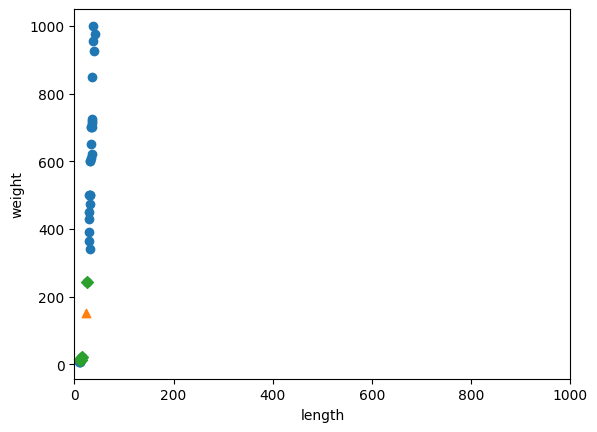

In [16]:
#numpy로 데이터 준비
import numpy as np

#이차원 배열로 물고기의 길이와 무게를 저장
fish_data = np.column_stack((fish_length, fish_weight))

#정답배열 생성
fish_target = np. concatenate((np.ones(35), np.zeros(14)))

#사이킷런으로 데이터 나누기
from sklearn.model_selection import train_test_split

#훈련셋과 테스트셋 생성
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

#============예측하기==========================

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

print(kn.predict([[25, 150]]))
#=> 0 : 빙어(오답)
#Why? x와 y의 스케일 차이!

distances, indexes = kn.kneighbors([[24, 150]])

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(24, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')

#스케일 조정 해보기
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


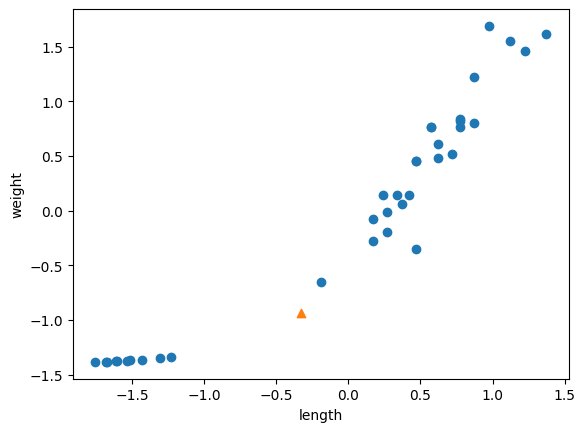

In [11]:
#표준 점수로 바꾸기

#평균 구하기 (axis = 0 : 행을 따라 계산)
mean = np.mean(train_input, axis=0)

#표준편차 구하기
std = np.std(train_input, axis=0)

#각 행마다 빼기 연산 진행(numpy broadcasting)
train_scaled = (train_input - mean) / std

new = ([24, 150] - mean) / std

#눈으로 봤을 때는 동일한 위치
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

> **전처리 데이터에서 모델 훈련**


`전처리` : 입력 데이터를 머신러닝 모델이 사용할 수 있도록 적절히 가공하는 것

[1.]


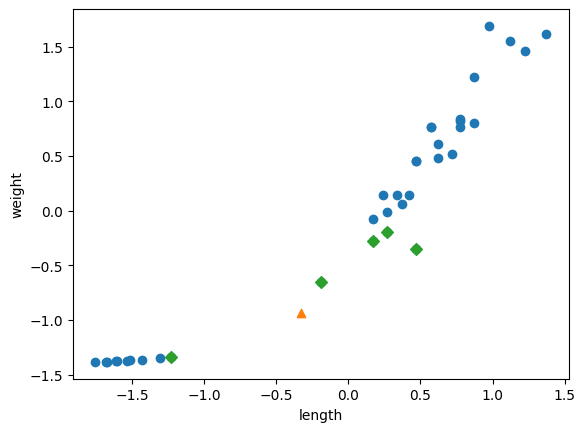

In [15]:
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

print(kn.predict([new]))
#=> 1 : 도미(정답)

distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()